# Logistic Regression
Logistic regression is based on the **sigmoid funtion**:
$
    g(z) = \frac{1}{1+e^{-z}}
$

If z > 0, g(z) >0.5 then y = 1. Otherwise y = 0. 


We can think about how this work as projecting some point in X domain into the sigmoid domain through a bunch of operation determined by $\theta$. The Logistic regression for finding the best suitable $\theta$ that makes points labelled as y=1 locate in the right and other points (y=0) locate in the left.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification,make_circles

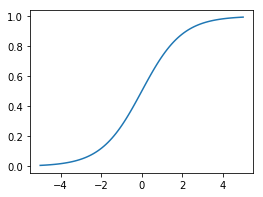

In [2]:
z = np.linspace(-5,5,100)
g = 1/(1+np.exp(-z))

plt.figure(figsize=(4,3))
plt.plot(z,g,'-')
plt.show()

## 1. Binary Classification 
The binary classification is the 0 or 1 problems. 

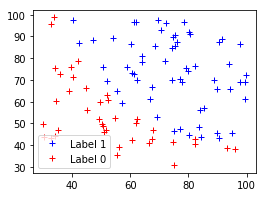

In [3]:
df = pd.read_csv('binary_linearboundary.txt')
X = df.iloc[:,0:2]
y = df.iloc[:,2]

X1 = X.iloc[:,0];
X2 = X.iloc[:,1];

idx1 = y==1
idx0 = y==0

plt.figure(figsize=(4,3))
plt.plot(X1[idx1],X2[idx1],'b+')
plt.plot(X1[idx0],X2[idx0],'r+')
plt.legend(('Label 1','Label 0'))
plt.show()


The **decision boudary** is determined by $A*X+b =0$, where A is the *classifier.coef_* and b is *classifier.intercept_*.

We can analytically calculate the decision boundary of a linear decision boudary and plot it.

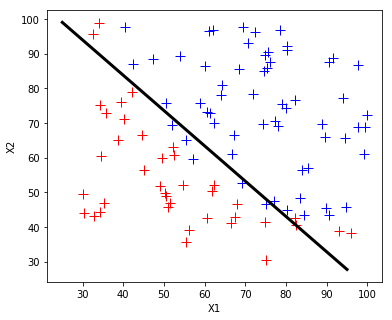

In [4]:
classifier = LogisticRegression(C=100,solver='lbfgs',penalty='l2')
# note : super large C means no penalty
classifier.fit(X,y)

# analytical decision boundary using coef_ - not a generalized method
b1 = np.linspace(25,95,100)
b2 = -(classifier.intercept_ + classifier.coef_[0,0]*b1)/classifier.coef_[0,1]


plt.figure(figsize=(6,5))
plt.plot(X1[idx1],X2[idx1],'b+',markersize=10)
plt.plot(X1[idx0],X2[idx0],'r+',markersize=10)
plt.plot(b1,b2,'k-',linewidth=3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

It is impossible to analytically calculte a nonlinear decision bounday, but we can plot the numerical decision boundary. *classifier.decision_function(X)* returns the distance of a sample to the decision boundary. A level-zeros contour of a meshgrid of samples is the decision boundary.

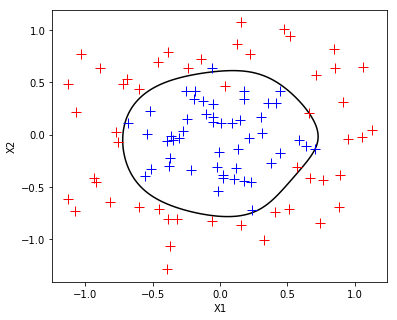

In [5]:
X, y = make_circles(n_samples=100,
                    noise = 0.2,
                    factor = 0.4,
                    random_state=1)

X1 = X[:,0];
X2 = X[:,1];

idx1 = y==1
idx0 = y==0

## High-order features of f1,f2, such as f1*f2,f1^2,f1*f2^2
polynomial_features = PolynomialFeatures(degree=6,include_bias=False)
X_poly = polynomial_features.fit_transform(X)

classifier = LogisticRegression(C=1000,solver='lbfgs',max_iter=1e4)
classifier.fit(X_poly,y)


# numerical decision boundary / region using predict
x1_test = np.linspace(-1,1,100)
x2_test = np.linspace(-1,1,100)

X1_test,X2_test = np.meshgrid(x1_test,x2_test)
X_test = np.hstack((X1_test.flatten().reshape(-1,1),X2_test.flatten().reshape(-1,1)))

X_test_poly = polynomial_features.transform(X_test)

p_test = classifier.decision_function(X_test_poly)
P_test = p_test.reshape(X1_test.shape)

#plt.pcolormesh(X1_, X2_, P, cmap=plt.cm.Paired)
plt.figure(figsize=(6,5))
plt.contour(X1_test,X2_test,P_test,0,colors='k')
plt.plot(X1[idx1],X2[idx1],'b+',markersize=10)
plt.plot(X1[idx0],X2[idx0],'r+',markersize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 2. Multiclass problems (more than two labels)
An example is the handwritten recogition from 0 to 9. The labels here is not only 0 or 1 instead 0,1,2,3,4,5,6,7,8,9.
There are total 10 labels in this problem.

*classifier = LogisticRegression(max_iter=1000,C=1,fit_intercept=True,multi_class='multinomial',solver='lbfgs')*
